# 2-Room Spatial Navigation Analyses

This document contains a demonstration of how to analyse and visualize the 2-Room Spatial Navigation data.

First, we import the required libraries.

In [1]:
import cogrecon.core.data_flexing.spatial_navigation.spatial_navigation_analytics as analytics
import cogrecon.core.data_flexing.spatial_navigation.spatial_navigation_parser as parser
import os

Then we establish our data directory and set the expected item labels given our experiment setup (for 2-room, the item labels are listed below).

In [2]:
directory = r'Z:\Kelsey\2017 Summer RetLu\Virtual_Navigation_Task\v5_2\NavigationTask_Data\Logged_Data'
parser.study_labels = ['PurseCube', 'CrownCube', 'BasketballCube', 'BootCube', 'CloverCube', 'GuitarCube', 'HammerCube', 'LemonCube', 'IceCubeCube', 'BottleCube']

Next, we'll generate the intermediate file for the test data. This file summarizes all of the critical information about the test locations in one file. We can also use this function to filter out individuals without the minimum number of required trial.

## TODO: Fix "incomplete trial" checker

In [3]:
analytics.generate_intermediate_files(directory, full_study_path=False, full_study_look=False, full_test_path=False,
                                full_test_look=False, full_practice_path=False, full_practice_look=False,
                                full_test_2d=False, full_test_vr=True, min_num_trials=4)

2018-01-28 18:17:32 DESKTOP-LKC15NF root[217840] INFO Done parsing command line arguments.
2018-01-28 18:17:39 DESKTOP-LKC15NF root[217840] INFO Found 446 files. Attempting to catalog filenames by Individual, Trial, and Phase
2018-01-28 18:17:39 DESKTOP-LKC15NF root[217840] INFO Found 222 raw files, 222 summary files, 0 test 2d raw files, and 2 non-matching files. Attempting to associate files.
2018-01-28 18:17:39 DESKTOP-LKC15NF root[217840] INFO Done cataloging files. 24 individuals found which conform to the trial minimum (4). 2 files not matching any expected filename format. 0 files excluded on input criteria.
2018-01-28 18:17:39 DESKTOP-LKC15NF root[217840] INFO Output directory (C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\examples\2018-01-28_18-17-39) created.
2018-01-28 18:17:39 DESKTOP-LKC15NF root[217840] INFO Creating output files.
2018-01-28 18:17:39 DESKTOP-LKC15NF root[217840] INFO Parsing input files.
2018-01-28 18:17:40 DESKTOP-LKC15NF root[217840] INFO Parsi

2018-01-28 18:18:02 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 0 (1/4).
2018-01-28 18:18:02 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 1 (2/4).
2018-01-28 18:18:02 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 2 (3/4).
2018-01-28 18:18:03 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 3 (4/4).
2018-01-28 18:18:03 DESKTOP-LKC15NF root[217840] INFO Parsing Individual 141 (19/24).
2018-01-28 18:18:03 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 0 (1/4).
2018-01-28 18:18:03 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 1 (2/4).
2018-01-28 18:18:04 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 2 (3/4).
2018-01-28 18:18:04 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 3 (4/4).
2018-01-28 18:18:04 DESKTOP-LKC15NF root[217840] INFO Parsing Individual 148 (20/24).
2018-01-28 18:18:04 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 0 (1/4).
2018-01-28 18:18:05 DESKTOP-LKC15NF root[217840] INFO Parsing Trial 1 (2/4).
2018-01-28 18:18:05 DESKTOP-LKC15NF root[217840] INFO Pars

Next, we can use the output of the intermediate file (note that you'll need to change the file path according to your date/time of running the analysis) to generate the iPosition formatted outputs. 

In [5]:
import cogrecon.core.data_flexing.spatial_navigation.spatial_navigation_analytics as analytics
import os

intermediate_files_dir = r'C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\examples\2018-01-28_18-17-39'
destination = r'C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\examples\2-room-iposition'
analytics.convert_to_iposition(os.path.join(intermediate_files_dir, r'vr_test.csv'), destination)

Finally, we'll get the iPosition output for the converted files.

In [ ]:
from cogrecon.core.batch_pipeline import batch_pipeline
import datetime
import logging

batch_pipeline(r"C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\tests\saved_data\4-room-iposition",
               datetime.datetime.now().strftime("Holodeck 4-Room Spatial Navigation - %Y-%m-%d_%H-%M-%S.csv"), 
               trial_by_trial_accuracy=False)

batch_pipeline(r"C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\tests\saved_data\4-room-iposition",
               datetime.datetime.now().strftime("Holodeck 4-Room Spatial Navigation with Categories - %Y-%m-%d_%H-%M-%S.csv"), 
               category_independence_enabled=True, category_prefixes=True, trial_by_trial_accuracy=False)

## Context Boundary Analysis

Next, we'll look at whether or not context boundary effects were present in the data.

In [ ]:
intermediate_files_dir = r'C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\tests\saved_data\2017-06-27_19-13-53'

analytics.generate_segmentation_analysis(intermediate_files_dir + r'\vr_test.csv', '4-room_segmentation_analysis.csv')

In [ ]:
from cogrecon.core.data_structures import ParticipantData, AnalysisConfiguration
from cogrecon.core.full_pipeline import full_pipeline

subid = '135'

root_path = r'C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\tests\saved_data\4-room-iposition'
full_pipeline(ParticipantData.load_from_file(root_path + r'\actual_coordinates.txt', 
                                             root_path + r'\{0}position_data_coordinates.txt'.format(subid), 
                                             None), 
              AnalysisConfiguration(trial_by_trial_accuracy=False), 
              visualize=True)

## Visualize a Path

In [1]:
from cogrecon.core.visualization.vis_spatial_navigation_2room import visualize
import os.path
from matplotlib import rc
rc('animation', html='html5')

%matplotlib inline

In [2]:
directory = r'Z:\Kelsey\2017 Summer RetLu\Virtual_Navigation_Task\v5_2\NavigationTask_Data\Logged_Data\2RoomTestAnonymous\124'
raw_filepath = os.path.join(directory, 'RawLog_Sub124_Trial1_13_15_57_30-05-2017.csv')
summary_filepath = os.path.join(directory, 'SummaryLog_Sub124_Trial1_13_15_57_30-05-2017.csv')

2018-01-26 17:45:28 DESKTOP-LKC15NF root[178952] INFO Reading raw file Z:\Kelsey\2017 Summer RetLu\Virtual_Navigation_Task\v5_2\NavigationTask_Data\Logged_Data\2RoomTestAnonymous\124\RawLog_Sub124_Trial1_13_15_57_30-05-2017.csv...
2018-01-26 17:45:48 DESKTOP-LKC15NF root[178952] INFO Reading summary file Z:\Kelsey\2017 Summer RetLu\Virtual_Navigation_Task\v5_2\NavigationTask_Data\Logged_Data\2RoomTestAnonymous\124\SummaryLog_Sub124_Trial1_13_15_57_30-05-2017.csv...
2018-01-26 17:45:48 DESKTOP-LKC15NF root[178952] INFO Processing raw path into simple path...
2018-01-26 17:45:48 DESKTOP-LKC15NF root[178952] INFO Plotting 77793 points.
2018-01-26 17:45:48 DESKTOP-LKC15NF root[178952] INFO Processing raw path into simple orientation...
2018-01-26 17:45:49 DESKTOP-LKC15NF root[178952] INFO Compressing data points...
2018-01-26 17:45:50 DESKTOP-LKC15NF root[178952] INFO Plotting 17890 compressed points.
2018-01-26 17:45:50 DESKTOP-LKC15NF root[178952] INFO Generating figures...
2018-01-26 17

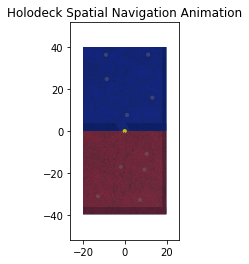

In [5]:
anim = visualize(raw_filepath, summary_filepath)

In [6]:
anim

IndexError: index 17890 is out of bounds for axis 1 with size 17890